# Basics of working with Date and Time

## Converting with `pd.to_datetime`

In [48]:
import pandas as pd
"2019-12-31"
"2019-31-12"
"12-31-2019"
"31-12-2019"
"31/12/2019"
"31.12.2019"
"12-31-19"
"December 31st 2019"
"Dec. 31st 19"
"2019-31-12 11:59pm"
"2019-31-12 23:59:45"

'2019-31-12 23:59:45'

In [49]:
pd.to_datetime("2019-12-31")

Timestamp('2019-12-31 00:00:00')

In [50]:
pd.to_datetime("2019/12/31")

Timestamp('2019-12-31 00:00:00')

In [51]:
pd.to_datetime("December 31st 2019")

Timestamp('2019-12-31 00:00:00')

In [52]:
pd.to_datetime("December 31st 2019 4pm")

Timestamp('2019-12-31 16:00:00')

In [53]:
pd.to_datetime("December 31st 2019 4:50am")

Timestamp('2019-12-31 04:50:00')

In [54]:
pd.to_datetime("Dec. 31st 1990 12pm")

Timestamp('1990-12-31 12:00:00')

In [55]:
pd.to_datetime("3:55:45 Apr. 2nd 90")

Timestamp('1990-04-02 03:55:45')

In [56]:
dates = ["3:55:45 Apr. 2nd 90", "3:55:45 Apr. 22nd 91"]
formatted_date = pd.to_datetime(dates)

C:\Users\S ravina\AppData\Local\Temp\ipykernel_18448\3630590583.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  formatted_date = pd.to_datetime(dates)


In [57]:
formatted_date

DatetimeIndex(['1990-04-02 03:55:45', '1991-04-22 03:55:45'], dtype='datetime64[ns]', freq=None)

## Specifying Fancy Formats with `pd.to_datetime()`

In [58]:
pd.to_datetime("10/11/12")

Timestamp('2012-10-11 00:00:00')

In [59]:
pd.to_datetime("10/11/12", dayfirst=True)

Timestamp('2012-11-10 00:00:00')

In [60]:
pd.to_datetime("10/11/12", dayfirst=True, yearfirst=True)

Timestamp('2010-12-11 00:00:00')

In [61]:
pd.to_datetime("10/11/12", format="%y/%m/%d")

Timestamp('2010-11-12 00:00:00')

In [62]:
ds = ["Dec 11 2019 Meeting", "Jan 6 2020 Meeting", "Mar 19 2020 Meeting"]

In [63]:
pd.to_datetime(ds, format="%b %d %Y Meeting")

DatetimeIndex(['2019-12-11', '2020-01-06', '2020-03-19'], dtype='datetime64[ns]', freq=None)

## Dates and DataFrames

* `parse_dates` - to take a date written as text and convert it into a structured, machine-readable date format.

In [64]:
ufos = pd.read_csv("./materials/data/nuforc_reports.csv")

In [65]:
ufos.head(5)

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN


In [66]:
ufos["date"] = pd.to_datetime(ufos["date_time"])

In [67]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,date
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12T18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22T00:00:00,37.343152,-77.408582,2019-12-12 18:43:00
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22T18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29T00:00:00,41.664800,-72.639300,2019-03-22 18:30:00
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaN,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaN,NaN,NaN,NaT
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17T02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18T00:00:00,45.381383,-75.708501,2019-04-17 02:00:00
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15T18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18T00:00:00,NaN,NaN,2009-03-15 18:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02T20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04T00:00:00,33.414036,-111.920920,2019-10-02 20:00:00
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02T20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04T00:00:00,37.642200,-93.399600,2019-10-02 20:00:00
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02T20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04T00:00:00,27.076210,-82.223280,2019-10-02 20:03:00
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02T22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04T00:00:00,35.605000,-82.313200,2019-10-02 22:00:00


In [68]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  object        
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
 12  date            86938 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(10)
memory usage: 8.7+ MB


In [69]:
ufos = pd.read_csv("./materials/data/nuforc_reports.csv", parse_dates=["date_time"])

In [70]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  object        
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 8.1+ MB


## The useful dt properties

`.dt` lets you extract datetime components like year, month, day, hour, weekday, etc., from a pandas datetime Series.

In [71]:
ufos["date_time"].dt.year.value_counts()

date_time
2014.0    8704
2012.0    8124
2013.0    7823
2015.0    6915
2019.0    5767
2016.0    5664
2011.0    5630
2008.0    5307
2017.0    5057
2009.0    4996
2010.0    4786
2007.0    4736
2006.0    3720
2018.0    3273
2005.0     566
2004.0     340
1997.0     300
2001.0     263
2000.0     243
2003.0     238
1998.0     229
2002.0     220
1999.0     220
1995.0     219
1996.0     200
1994.0     197
1978.0     195
1975.0     180
1977.0     169
1976.0     164
1974.0     148
1979.0     148
1993.0     148
1988.0     147
1973.0     138
1985.0     133
1990.0     132
1989.0     131
1980.0     131
1992.0     130
1987.0     124
1991.0     119
1986.0     111
1983.0     109
1981.0     106
1970.0     100
1982.0      97
1969.0      97
1972.0      92
1984.0      84
1971.0      68
Name: count, dtype: int64

<Axes: xlabel='date_time'>

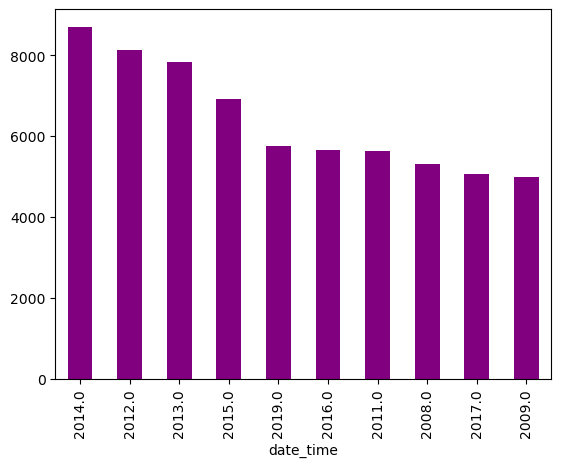

In [72]:
ufos["date_time"].dt.year.value_counts().head(10).plot(kind="bar", color="purple")

In [73]:
ufos["date_time"].dt.month.value_counts()

date_time
7.0     10682
8.0      8997
9.0      8498
10.0     8371
6.0      8357
11.0     7596
12.0     6525
5.0      6063
1.0      5979
4.0      5817
3.0      5494
2.0      4559
Name: count, dtype: int64

In [74]:
ufos["date_time"].dt.day.value_counts()

date_time
1.0     4852
15.0    4403
4.0     3864
20.0    3016
12.0    2945
10.0    2923
24.0    2831
25.0    2805
30.0    2793
7.0     2776
5.0     2755
14.0    2739
22.0    2723
3.0     2708
19.0    2681
18.0    2678
11.0    2639
8.0     2635
23.0    2634
13.0    2634
17.0    2607
21.0    2602
16.0    2598
6.0     2578
28.0    2555
27.0    2531
9.0     2443
26.0    2430
2.0     2425
29.0    2364
31.0    1771
Name: count, dtype: int64

<Axes: xlabel='date_time'>

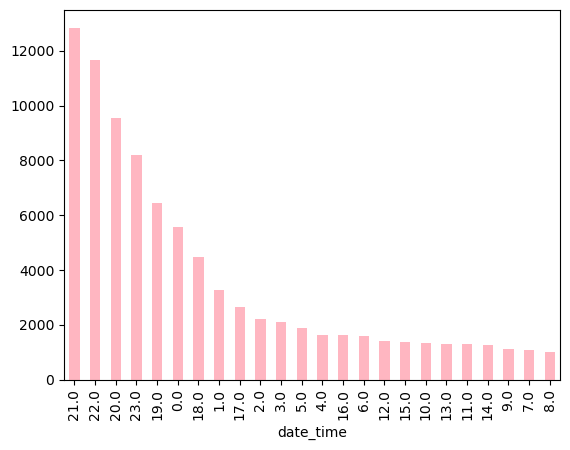

In [75]:
ufos["date_time"].dt.hour.value_counts().plot(kind="bar", color="lightpink")

In [76]:
ufos["date_time"].dt.dayofweek.value_counts()

date_time
5.0    16305
4.0    12864
6.0    12652
3.0    11729
2.0    11646
1.0    10987
0.0    10755
Name: count, dtype: int64

## Comparing Dates

In [77]:
ufos[ufos["date_time"] < "1980"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
8,Ufos report in Irving Texas at 2200 hrs. On or...,Dallas,TX,1973-07-14 22:00:00,oval,6 minutes,Occurred : 7/14/1973 22:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/145/S145751.html,Ufos report in Irving Texas at 2200 hrs. On o...,2019-04-25T00:00:00,32.835168,-96.808118
15,Strange bright light hovered over mobile home.,Gray Court,SC,1975-07-17 00:00:00,light,5 minutes,Occurred : 7/17/1975 00:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/147/S147117.html,Strange bright light hovered over mobile home....,2019-07-05T00:00:00,34.578800,-82.114100
31,Bright green round object quickly travelling e...,N. Cascades Nat. Park,WA,1979-07-15 23:00:00,light,2x ~10sec,Occurred : 7/15/1979 23:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/050/S50300.html,Bright green round object quickly travelling e...,2006-05-15T00:00:00,NaN,NaN
54,It was a full moon when my brother and I obser...,Lawrenceburg,KY,1969-06-01 21:00:00,disk,5 minutes,Occurred : 6/1/1969 21:00 (Entered as : 1969 ...,http://www.nuforc.org/webreports/049/S49947.html,It was a full moon when my brother and I obser...,2006-05-15T00:00:00,38.005200,-84.983000
55,"UFO over Orangevale, CA in May/June 1969",Orangevale,CA,1969-06-01 23:00:00,unknown,30 to 45 minutes,Occurred : 6/1/1969 23:00 (Entered as : 06/01...,http://www.nuforc.org/webreports/049/S49619.html,"UFO over Orangevale, CA in May/June 1969 My fi...",2006-05-15T00:00:00,38.684500,-121.222300
...,...,...,...,...,...,...,...,...,...,...,...,...
87166,VERY LARGE OBJECT- WHITE LIGHT ILLUMINATING MY...,Anoka,MN,1976-06-30 21:00:00,light,5 minutes,Occurred : 6/30/1976 21:00 (Entered as : 22:0...,http://www.nuforc.org/webreports/149/S149050.html,VERY LARGE OBJECT- WHITE LIGHT ILLUMINATING MY...,2019-10-04T00:00:00,45.287400,-93.433600
87167,"7 ""PEARLESCENT"" HIGH ALTITUDE CRAFT IN V FORMA...",Long Beach,CA,1976-11-18 13:00:00,circle,20 seconds,Occurred : 11/18/1976 13:00 (Entered as : 11/...,http://www.nuforc.org/webreports/149/S149389.html,"7 ""PEARLESCENT"" HIGH ALTITUDE CRAFT IN V FORMA...",2019-10-04T00:00:00,33.790023,-118.173105
87168,The even occurred North of Mt Calvary Rd on Ol...,Thomasville,NC,1977-04-14 23:00:00,disk,10 minutes,Occurred : 4/14/1977 23:00 (Entered as : 4/14...,http://www.nuforc.org/webreports/149/S149395.html,The even occurred North of Mt Calvary Rd on Ol...,2019-10-04T00:00:00,35.882600,-80.082000
87169,Triangle ship passed over silent with 7 green ...,Stratford,TX,1977-07-06 11:45:00,triangle,10 minutes,Occurred : 7/6/1977 11:45 (Entered as : 07/06...,http://www.nuforc.org/webreports/149/S149474.html,Triangle ship passed over silent with 7 green ...,2019-10-04T00:00:00,36.277900,-102.015600


In [78]:
ufos[ufos["date_time"] > "2019-12-23"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
85714,7-8 elongated objects flying in straight line ...,Wilmington,NC,2019-12-29 20:40:00,cigar,10 seconds,Occurred : 11/29/2019 20:40 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151158.html,7-8 elongated objects flying in straight line ...,2019-12-01T00:00:00,34.238375,-77.878468


In [79]:
ufos[ufos["date_time"].dt.hour == 0.0].head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
15,Strange bright light hovered over mobile home.,Gray Court,SC,1975-07-17,light,5 minutes,Occurred : 7/17/1975 00:00 (Entered as : 07/1...,http://www.nuforc.org/webreports/147/S147117.html,Strange bright light hovered over mobile home....,2019-07-05T00:00:00,34.578800,-82.114100
16,There were 4 lights in diagonal formation that...,Yuba City,CA,2019-08-17,formation,20 minutes,Occurred : 8/17/2019 00:00 (Entered as : 0817...,http://www.nuforc.org/webreports/148/S148345.html,There were 4 lights in diagonal formation that...,2019-08-23T00:00:00,39.059811,-121.668256
66,ODD SOUND,Essex (UK/England),NaN,1972-05-07,unknown,3 mins,Occurred : 5/7/1972 00:00 (Entered as : 5/7/7...,http://www.nuforc.org/webreports/050/S50480.html,ODD SOUND THE YEAR 1972 I WAS JUST GOING TO ...,2006-05-15T00:00:00,NaN,NaN
89,IT WAS IN THE SUMMER OF JULY-1977 WE HAD A WIN...,Rock Hill,SC,1977-07-15,disk,NaN,Occurred : 7/15/1977 (Entered as : JULY]1977...,http://www.nuforc.org/webreports/049/S49789.html,IT WAS IN THE SUMMER OF JULY-1977 WE HAD A WIN...,2006-05-15T00:00:00,34.945105,-81.054183
103,flying saucer with colored light turning aroud...,Rouyn Noranda,QC,1982-06-01,disk,3 mins,Occurred : 6/1/1982 (Entered as : 1982) Repo...,http://www.nuforc.org/webreports/050/S50475.html,Flying saucer with colored light turning aroud...,2006-05-15T00:00:00,NaN,NaN


In [80]:
ufos[ufos["date_time"].between("1988", "1989")].sort_values("date_time")

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
4128,fast moving Triangle with no sound and orange ...,Roselle,IL,1988-01-01 03:00:00,triangle,2-3 min,Occurred : 1/1/1988 03:00 (Entered as : jan 1...,http://www.nuforc.org/webreports/052/S52855.html,fast moving Triangle with no sound and orange ...,2006-10-30T00:00:00,41.979200,-88.089500
8389,"Gigantic circular object hovering, and then wi...",Kenner,LA,1988-01-01 17:00:00,circle,20 minutes,Occurred : 1/1/1988 17:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/062/S62422.html,"Gigantic circular object hovering, and then wi...",2008-03-31T00:00:00,30.017503,-90.251064
2071,Broad daylight gold colored flying object abou...,New Britain Twp,PA,1988-01-03 13:00:00,oval,15 minutes,Occurred : 1/3/1988 13:00 (Entered as : 01/03...,http://www.nuforc.org/webreports/147/S147265.html,Broad daylight gold colored flying object abou...,2019-07-05T00:00:00,NaN,NaN
33511,"A dull yellow light, low off the ground and no...",Williamsfield,IL,1988-01-10 22:10:00,unknown,27 minutes,Occurred : 1/10/1988 22:10 (Entered as : 01/1...,http://www.nuforc.org/webreports/082/S82609.html,"A dull yellow light, low off the ground and no...",2011-08-07T00:00:00,40.934800,-90.025900
16295,"8 gliding craft in formation with a 9th ""quant...",Cambridge,MA,1988-01-12 03:30:00,oval,15 seconds,Occurred : 1/12/1988 03:30 (Entered as : 1/12...,http://www.nuforc.org/webreports/066/S66040.html,"8 gliding craft in formation with a 9th ""quant...",2008-10-31T00:00:00,42.366795,-71.095464
...,...,...,...,...,...,...,...,...,...,...,...,...
82524,"Very bright light moving from South to North, ...",Dry Creek,OK,1988-11-11 06:30:00,other,2 minutes,Occurred : 11/11/1988 06:30 (Entered as : 11/...,http://www.nuforc.org/webreports/143/S143296.html,"Very bright light moving from South to North, ...",2018-10-06T00:00:00,NaN,NaN
21938,large saucer shaped object with many colored l...,Dexter,NY,1988-11-15 05:30:00,disk,1 minute-2mins,Occurred : 11/15/1988 05:30 (Entered as : 11/...,http://www.nuforc.org/webreports/075/S75842.html,large saucer shaped object with many colored l...,2010-06-23T00:00:00,44.014500,-76.094400
8808,Black huge triangle craft with chevron shape o...,Stockton,CA,1988-11-15 18:00:00,triangle,7 - 10 min,Occurred : 11/15/1988 18:00 (Entered as : 110...,http://www.nuforc.org/webreports/051/S51131.html,Black huge triangle craft with chevron shape o...,2006-07-16T00:00:00,37.982736,-121.319767
4363,saw 5 objects doing amazing manuevers for 20 m...,Alamogordo,NM,1988-11-27 21:00:00,light,15-20 minutes,Occurred : 11/27/1988 21:00 (Entered as : 11/...,http://www.nuforc.org/webreports/062/S62960.html,saw 5 objects doing amazing manuevers for 20 m...,2008-06-12T00:00:00,32.842068,-105.970481


In [81]:
ufos[ufos["date_time"] > "2019-12-22"]

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
3892,Lights in a row. ((NUFORC Note: Starlink sat...,Rohnert Park,CA,2019-12-22 06:05:00,light,2 - 3 minutes,Occurred : 12/22/2019 06:05 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151866.html,Lights in a row Three of us saw 15 same shaped...,2019-12-22T00:00:00,38.343239,-122.704051
3893,I saw a very big circle like thing in the sky ...,Chicago,IL,2019-12-22 08:00:00,circle,20 min,Occurred : 12/22/2019 08:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151816.html,I saw a very big circle like thing in the sky ...,2019-12-22T00:00:00,41.879912,-87.668018
3894,I saw and photographed an object hovering abou...,Deming,NM,2019-12-22 16:00:00,other,1 hour,Occurred : 12/22/2019 16:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151856.html,I saw and photographed an object hovering abou...,2019-12-22T00:00:00,32.228609,-107.763055
3895,I stepped out back and saw a straight line pro...,Hays,KS,2019-12-22 18:00:00,light,10 min,Occurred : 12/22/2019 18:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151832.html,I stepped out back and saw a straight line pro...,2019-12-22T00:00:00,38.900100,-99.347000
3896,string of lights evenly spaced moving across s...,Reno,NV,2019-12-22 18:00:00,formation,5 minutes,Occurred : 12/22/2019 18:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151868.html,string of lights evenly spaced moving across s...,2019-12-22T00:00:00,39.506507,-119.817451
3897,satellite like looking objects single file lin...,Santa Cruz,CA,2019-12-22 18:00:00,sphere,5 minutes,Occurred : 12/22/2019 18:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151863.html,satellite like looking objects single file lin...,2019-12-22T00:00:00,37.011257,-122.044509
3898,OBJECTS APPEAR AS SATELLITES IN FORMATION. ((...,Hayward,CA,2019-12-22 18:00:00,light,15 min,Occurred : 12/22/2019 18:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151879.html,OBJECTS APPEAR AS SATELLITES IN FORMATION 30 B...,2019-12-22T00:00:00,37.650290,-122.076005
3899,31 UFOs seen traveling SW to NE in a mostly ev...,Salinas,CA,2019-12-22 18:00:00,light,~15min,Occurred : 12/22/2019 18:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151871.html,31 UFOs seen traveling SW to NE in a mostly ev...,2019-12-22T00:00:00,36.688525,-121.628455
3900,Lights in sky in straight line at satellite he...,Castro Valley,CA,2019-12-22 18:10:00,formation,5min,Occurred : 12/22/2019 18:10 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151864.html,Lights in sky in straight line at satellite he...,2019-12-22T00:00:00,37.705756,-122.069713
3901,The objects looked very high altitude. ((Star...,Grain valley,MO,2019-12-22 18:30:00,light,5 minutes,Occurred : 12/22/2019 18:30 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151843.html,The objects looked very high altitude Moving s...,2019-12-22T00:00:00,38.992700,-94.215100


In [82]:
ufos["date_time"].dt.date.value_counts()

date_time
2015-11-07    290
2014-07-04    270
2010-07-04    210
2012-07-04    200
2013-07-04    185
             ... 
1980-09-12      1
1988-06-13      1
1981-07-29      1
2004-07-04      1
2003-09-07      1
Name: count, Length: 8351, dtype: int64

In [83]:
recent_sightings = ufos[ufos["date_time"].dt.year >= 2018]
recent_sightings.sort_values("date_time")

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude
79265,"Several orange lights moving slowly, which fad...",Albuquerque,NM,2018-01-01 00:00:00,light,10 minutes,Occurred : 1/1/2018 00:00 (Entered as : 01/01...,http://www.nuforc.org/webreports/138/S138159.html,"Several orange lights moving slowly, which fad...",2018-01-12T00:00:00,35.103481,-106.612475
79266,This event was recorded by the news station wh...,Seattle,WA,2018-01-01 00:00:00,triangle,30 seconds,Occurred : 1/1/2018 00:00 (Entered as : 01/1/...,http://www.nuforc.org/webreports/138/S138208.html,This event was recorded by the news station wh...,2018-01-12T00:00:00,47.609046,-122.326028
79267,3 Star like crafts in New Years 2018,Miami,FL,2018-01-01 00:00:00,circle,~10 minutes +,Occurred : 1/1/2018 00:00 (Entered as : 1/1/2...,http://www.nuforc.org/webreports/138/S138181.html,3 Star like crafts in New Years 2018 My husban...,2018-01-12T00:00:00,25.774143,-80.289519
79268,I saw one floating orb while facing north. Th...,Spokane Valley,WA,2018-01-01 00:02:00,fireball,10 minutes,Occurred : 1/1/2018 00:02 (Entered as : 01/01...,http://www.nuforc.org/webreports/138/S138175.html,I saw one floating orb while facing north. Th...,2018-01-12T00:00:00,NaN,NaN
79269,I was looking out the south window at 12;04AM....,Port Charlotte,FL,2018-01-01 00:04:00,circle,4 minutes,Occurred : 1/1/2018 00:04 (Entered as : 01/01...,http://www.nuforc.org/webreports/138/S138165.html,I was looking out the south window at 12;04AM....,2018-01-12T00:00:00,26.981007,-82.116907
...,...,...,...,...,...,...,...,...,...,...,...,...
3938,"Disc Shape Hovering, ((Starlink satellites?))",Fishkill,NY,2019-12-22 20:35:00,disk,1 minute,Occurred : 12/22/2019 20:35 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151810.html,"Disc Shape Hovering, I was driving on 52 heade...",2019-12-22T00:00:00,41.527700,-73.907200
3939,"Hello, My wife and I been seeing these objects...",Bethlehem,PA,2019-12-22 21:00:00,unknown,Hours,Occurred : 12/22/2019 21:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151873.html,"Hello, My wife and I been seeing these objects...",2019-12-22T00:00:00,40.635039,-75.371432
3940,Witness to triangle style craft. View was from...,Kennett Square,PA,2019-12-22 22:15:00,triangle,3min,Occurred : 12/22/2019 22:15 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151874.html,Witness to triangle style craft. View was from...,2019-12-22T00:00:00,39.846800,-75.711600
3941,7 white lights seen to the W side of the state...,Clarkston,MI,2019-12-22 23:00:00,circle,5 minutes,Occurred : 12/22/2019 23:00 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151836.html,7 white lights seen to the west side of the st...,2019-12-22T00:00:00,42.739865,-83.417150


In [84]:
recent_sightings["date_time"].dt.date.value_counts()

date_time
2019-11-11    77
2019-05-25    69
2019-05-26    67
2019-05-24    60
2019-07-04    57
              ..
2019-12-29     1
2018-02-08     1
2019-05-09     1
2018-02-04     1
2018-02-07     1
Name: count, Length: 719, dtype: int64

## DateMath & TimeDeltas

In [85]:
ufos["posted"] = pd.to_datetime(ufos["posted"])

In [86]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   summary         88095 non-null  object        
 1   city            87888 non-null  object        
 2   state           82890 non-null  object        
 3   date_time       86938 non-null  datetime64[ns]
 4   shape           85627 non-null  object        
 5   duration        84951 non-null  object        
 6   stats           88088 non-null  object        
 7   report_link     88125 non-null  object        
 8   text            88070 non-null  object        
 9   posted          86938 non-null  datetime64[ns]
 10  city_latitude   72013 non-null  float64       
 11  city_longitude  72013 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(8)
memory usage: 8.1+ MB


In [87]:
ufos["time_before_reported"] = ufos["posted"] - ufos["date_time"]

In [88]:
ufos

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,time_before_reported
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,9 days 05:17:00
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,6 days 05:30:00
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaT
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18,45.381383,-75.708501,0 days 22:00:00
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18,NaN,NaN,3685 days 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88120,4 lights in formation over Tempe appear while ...,Tempe,AZ,2019-10-02 20:00:00,formation,3 minutes,Occurred : 10/2/2019 20:00 (Entered as : 10/2...,http://www.nuforc.org/webreports/149/S149463.html,4 lights in formation over Tempe appear while ...,2019-10-04,33.414036,-111.920920,1 days 04:00:00
88121,"2 bright star like lights in the NNW skys, ((...",Bolivar,MO,2019-10-02 20:00:00,light,20 seconds,Occurred : 10/2/2019 20:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149405.html,2 bright star like lights in the NNW sky two b...,2019-10-04,37.642200,-93.399600,1 days 04:00:00
88122,I just witnessed a ‘Phoenix Lights’ type of fo...,North Port,FL,2019-10-02 20:03:00,formation,20 seconds,Occurred : 10/2/2019 20:03 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149424.html,10/2/19 @ 8:03PM EST UFO SIGHTING in the 3428...,2019-10-04,27.076210,-82.223280,1 days 03:57:00
88123,"Witnessed an orange, slow moving light. Was lo...",Black Mountain,NC,2019-10-02 22:00:00,fireball,2 minutes,Occurred : 10/2/2019 22:00 (Entered as : 10/0...,http://www.nuforc.org/webreports/149/S149447.html,"Witnessed an orange, slow moving light. Was lo...",2019-10-04,35.605000,-82.313200,1 days 02:00:00


In [89]:
ufos["posted"] - ufos["date_time"]

0          9 days 05:17:00
1          6 days 05:30:00
2                      NaT
3          0 days 22:00:00
4       3685 days 06:00:00
               ...        
88120      1 days 04:00:00
88121      1 days 04:00:00
88122      1 days 03:57:00
88123      1 days 02:00:00
88124      1 days 02:00:00
Length: 88125, dtype: timedelta64[ns]

In [90]:
ufos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88125 entries, 0 to 88124
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype          
---  ------                --------------  -----          
 0   summary               88095 non-null  object         
 1   city                  87888 non-null  object         
 2   state                 82890 non-null  object         
 3   date_time             86938 non-null  datetime64[ns] 
 4   shape                 85627 non-null  object         
 5   duration              84951 non-null  object         
 6   stats                 88088 non-null  object         
 7   report_link           88125 non-null  object         
 8   text                  88070 non-null  object         
 9   posted                86938 non-null  datetime64[ns] 
 10  city_latitude         72013 non-null  float64        
 11  city_longitude        72013 non-null  float64        
 12  time_before_reported  86938 non-null  timedelta64[ns]
dtypes

In [92]:
longest_wait = ufos.sort_values("time_before_reported", ascending=False).head(10)

In [93]:
longest_wait["time_before_reported"]

86762   18463 days 00:00:00
87145   18353 days 22:30:00
721     18314 days 03:00:00
1576    18287 days 00:00:00
1580    18240 days 08:00:00
84984   18099 days 23:00:00
83965   17963 days 00:00:00
722     17951 days 00:00:00
723     17904 days 22:00:00
1301    17873 days 06:00:00
Name: time_before_reported, dtype: timedelta64[ns]

In [94]:
longest_wait["time_before_reported"].dt.days

86762    18463
87145    18353
721      18314
1576     18287
1580     18240
84984    18099
83965    17963
722      17951
723      17904
1301     17873
Name: time_before_reported, dtype: int64

In [96]:
ufos["days_before_reporting"] = ufos["time_before_reported"].dt.days

In [97]:
ufos.head()

,summary,city,state,date_time,shape,duration,stats,report_link,text,posted,city_latitude,city_longitude,time_before_reported,days_before_reporting
0,My wife was driving southeast on a fairly popu...,Chester,VA,2019-12-12 18:43:00,light,5 seconds,Occurred : 12/12/2019 18:43 (Entered as : 12/...,http://www.nuforc.org/webreports/151/S151739.html,My wife was driving southeast on a fairly popu...,2019-12-22,37.343152,-77.408582,9 days 05:17:00,9.0
1,I think that I may caught a UFO on the NBC Nig...,Rocky Hill,CT,2019-03-22 18:30:00,circle,3-5 seconds,Occurred : 3/22/2019 18:30 (Entered as : 03/2...,http://www.nuforc.org/webreports/145/S145297.html,I think that I may caught a UFO on the NBC Nig...,2019-03-29,41.664800,-72.639300,6 days 05:30:00,6.0
2,I woke up late in the afternoon 3:30-4pm. I we...,NaN,NaN,NaT,NaN,NaN,Occurred : 4/1/2019 15:45 (Entered as : April...,http://www.nuforc.org/webreports/145/S145556.html,I woke up late in the afternoon 3:30-4pm. I w...,NaT,NaN,NaN,NaT,NaN
3,I was driving towards the intersection of fall...,Ottawa,ON,2019-04-17 02:00:00,teardrop,10 seconds,Occurred : 4/17/2019 02:00 (Entered as : 04-1...,http://www.nuforc.org/webreports/145/S145697.html,I was driving towards the intersection of fall...,2019-04-18,45.381383,-75.708501,0 days 22:00:00,0.0
4,"In Peoria Arizona, I saw a cigar shaped craft ...",Peoria,NY,2009-03-15 18:00:00,cigar,2 minutes,Occurred : 3/15/2009 18:00 (Entered as : 03/1...,http://www.nuforc.org/webreports/145/S145723.html,"In Peoria, Arizona, I saw a cigar shaped craft...",2019-04-18,NaN,NaN,3685 days 06:00:00,3685.0


## Billboard Charts Dataset Exploration

In [98]:
charts = pd.read_csv("./materials/data/billboard_charts.csv", parse_dates=["date"])

In [100]:
charts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330087 entries, 0 to 330086
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            330087 non-null  datetime64[ns]
 1   rank            330087 non-null  int64         
 2   song            330087 non-null  object        
 3   artist          330087 non-null  object        
 4   last-week       297775 non-null  float64       
 5   peak-rank       330087 non-null  int64         
 6   weeks-on-board  330087 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 17.6+ MB


<Axes: xlabel='artist'>

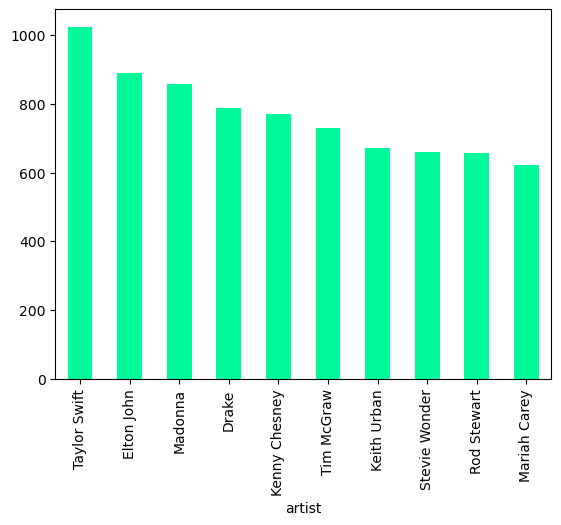

In [103]:
charts["artist"].value_counts().head(10).plot(kind="bar", color="mediumspringgreen")

In [105]:
number_ls = charts["rank"] == 1
charts[number_ls]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
0,2021-11-06,1,Easy On Me,Adele,1.0,1,3
100,2021-10-30,1,Easy On Me,Adele,68.0,1,2
200,2021-10-23,1,Industry Baby,Lil Nas X & Jack Harlow,2.0,1,12
300,2021-10-16,1,Stay,The Kid LAROI & Justin Bieber,2.0,1,13
400,2021-10-09,1,My Universe,Coldplay x BTS,NaN,1,1
...,...,...,...,...,...,...,...
329587,1958-09-01,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,2.0,1,5
329687,1958-08-25,1,Little Star,The Elegants,2.0,1,4
329787,1958-08-18,1,Nel Blu Dipinto Di Blu (Volaré),Domenico Modugno,2.0,1,3
329887,1958-08-11,1,Poor Little Fool,Ricky Nelson,1.0,1,2


<Axes: xlabel='artist'>

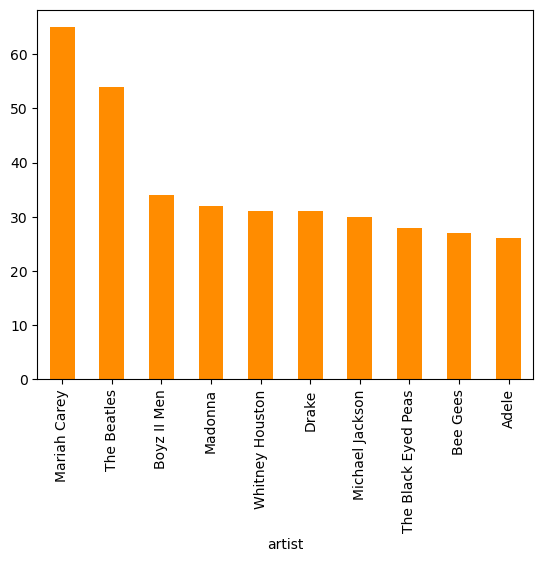

In [107]:
charts[number_ls]["artist"].value_counts().head(10).plot(kind="bar", color="darkorange")

In [108]:
charts[number_ls]["song"].value_counts()

song
Old Town Road                               19
Despacito                                   16
One Sweet Day                               16
Rockstar                                    15
I'll Make Love To You                       14
                                            ..
Then Came You                                1
You Haven't Done Nothin                      1
You Ain't Seen Nothing Yet/Free Wheelin'     1
Whatever Gets You Thru The Night             1
I'll Take You There                          1
Name: count, Length: 1104, dtype: int64

In [109]:
charts[charts["song"] == "Old Town Road"]

,date,rank,song,artist,last-week,peak-rank,weeks-on-board
9445,2020-01-18,46,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,15.0,1,45
9514,2020-01-11,15,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,34.0,1,44
9633,2020-01-04,34,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,41.0,1,43
9740,2019-12-28,41,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,39.0,1,42
9838,2019-12-21,39,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,31.0,1,41
9930,2019-12-14,31,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,20.0,1,40
10019,2019-12-07,20,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,27.0,1,39
10126,2019-11-30,27,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,21.0,1,38
10220,2019-11-23,21,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,18.0,1,37
10317,2019-11-16,18,Old Town Road,Lil Nas X Featuring Billy Ray Cyrus,21.0,1,36


<Axes: xlabel='date'>

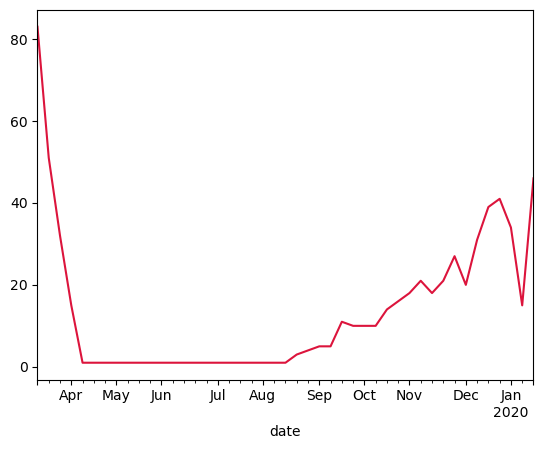

In [114]:
charts[charts["song"] == "Old Town Road"].set_index("date")["rank"].plot(color="crimson")

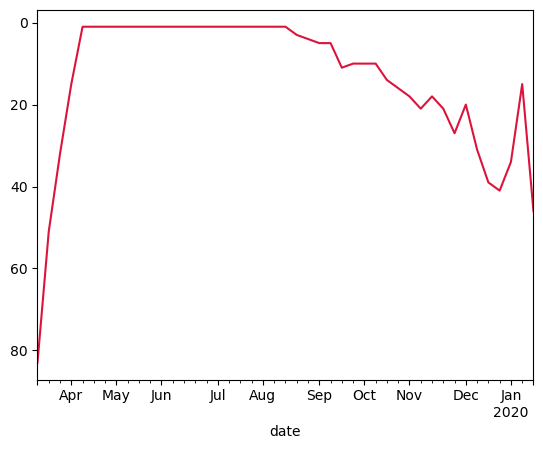

In [116]:
p = charts[charts["song"] == "Old Town Road"].set_index("date")["rank"].plot(color="crimson")
p.invert_yaxis()